# Pokémon. Trobant els vertaders  llegendaris amb models  d’aprenentatge computacional.

Aquest Notebook estarà dedicat a fer un model que pugui fer la predicció sobre si un Pokémon és realment legendari. Ens basarem en les estadístiques d'aquests i altres paràmetres per veure si els Pokémon legendaris ho haurien de ser per estadístiques i si hi hagués altres Pokémon que no ho fossin si poguessin entrar en aquesta categoria.

Per aquest Notebook cal tenir els següents arxius:

    - pokemon.csv: Dataset dels Pokémon des de la 1a fins a la 7a generació.
    - img folder: Carpeta amb les imatges de tots els Pokémon, extreta d'aquest dataset: "https://www.kaggle.com/datasets/arenagrenade/the-complete-pokemon-images-data-set".

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import sklearn

In [3]:
df = pd.read_csv('pokemon.csv')
df.shape

(801, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [5]:
df.describe()

against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000       0.500000      0.500000        1.000000   
50%         1.000000       1.000000      1.000000        1.000000   
75%         1.000000       1.000000      2.000000        1.000000   
max         4.000000       4.000000      4.000000        4.000000   

       against_ghost  against_grass  ...    height_m          hp  \
count     801.000000     801.000000  ...  781.000000  801.000000   
mean        0.985019       1.034020  ...    1.163892   68.958801   
std         0.558256       0.788896  ...    1.080326   26.576015   
min         0.000000       0.250000  ...    0.100000    1.000000   
25%         1.000000       0.500000  ...    0.600000   50.000000   
50%         1.000000       1.000000  ...    1.000000   65.000000   
75%         1.000000       1.000000  ...    1.500000   80.000000   
max         4.000000       4.000000  ...   14.500000  255.000000   

       percentage_male  pokedex_number   sp_attack  sp_defense       speed  \
count       703.000000      801.000000  801.000000  801.000000  801.000000   
mean         55.155761      401.000000   71.305868   70.911361   66.334582   
std          20.261623      231.373075   32.353826   27.942501   28.907662   
min           0.000000        1.000000   10.000000   20.000000    5.000000   
25%          50.000000      201.000000   45.000000   50.000000   45.000000   
50%          50.000000      401.000000   65.000000   66.000000   65.000000   
75%          50.000000      601.000000   91.000000   90.000000   85.000000   
max         100.000000      801.000000  194.000000  230.000000  180.000000   

        weight_kg  generation  is_legendary  
count  781.000000  801.000000    801.000000  
mean    61.378105    3.690387      0.087391  
std    109.354766    1.930420      0.282583  
min      0.100000    1.000000      0.000000  
25%      9.000000    2.000000      0.000000  
50%     27.300000    4.000000      0.000000  
75%     64.800000    5.000000      0.000000  
max    999.900000    7.000000      1.000000  

[8 rows x 34 columns]

# Gestió de NaNs i Possibles Mapejats

## NaNs

Primer de tot veurem quines columnes hi ha amb NaNs i com ho gestionarem:

In [6]:
col_num = list(df.select_dtypes(exclude=['object']).columns)
col_obj = list(df.select_dtypes(include=['object']).columns)
col_nans = df.columns[df.isnull().any()]

print("Columnes numèriques:", len(col_num))
print("Columnes objecte:", len(col_obj))
print("Columnes amb NaNs:", len(col_nans))

Columnes numèriques: 34
Columnes objecte: 7
Columnes amb NaNs: 4


In [7]:
df[col_nans].head()

height_m  percentage_male   type2  weight_kg
0       0.7             88.1  poison        6.9
1       1.0             88.1  poison       13.0
2       2.0             88.1  poison      100.0
3       0.6             88.1     NaN        8.5
4       1.1             88.1     NaN       19.0

In [8]:
print("Nombre de valors nuls per columna:")
df[col_nans].isnull().sum()

Nombre de valors nuls per columna:


height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

El major nombre de NaNs està a type2. Explorarem amb dades reals per què hi ha tantes NaNs. Posem l'exemple més conegut de tots "Pikachu", sabem que és de tipus Elèctric i no te cap tipus secundari.

In [9]:
df[df.name == 'Pikachu'][["name","type1","type2"]]

name     type1 type2
24  Pikachu  electric   NaN

Veiem que està el NaN a type2, que passarà si busquem un Pokémon amb un tipus secundari? Per exemple, Charizard?

In [10]:
df[df.name == 'Charizard'][["name","type1","type2"]]

name type1   type2
5  Charizard  fire  flying

Sembla que el NaN a type2 és pels Pokémon que no tenen tipus secundari. Per arreglar això, mapejarem les nans a tipus: None.

In [11]:
df.type2.fillna("None", inplace=True)
df[df.name == 'Pikachu'][["name","type1","type2"]]

name     type1 type2
24  Pikachu  electric  None

Ara, Pikachu tindrà els dos tipus bén marcats.

## Columnes Objecte

Seguidament, veurem si les columnes objecte estan ben distribuides.

In [12]:
df[col_obj].head()

abilities capture_rate   classfication     japanese_name  \
0  ['Overgrow', 'Chlorophyll']           45    Seed Pokémon  Fushigidaneフシギダネ   
1  ['Overgrow', 'Chlorophyll']           45    Seed Pokémon   Fushigisouフシギソウ   
2  ['Overgrow', 'Chlorophyll']           45    Seed Pokémon  Fushigibanaフシギバナ   
3     ['Blaze', 'Solar Power']           45  Lizard Pokémon      Hitokageヒトカゲ   
4     ['Blaze', 'Solar Power']           45   Flame Pokémon       Lizardoリザード   

         name  type1   type2  
0   Bulbasaur  grass  poison  
1     Ivysaur  grass  poison  
2    Venusaur  grass  poison  
3  Charmander   fire    None  
4  Charmeleon   fire    None

De les 7 que hem vist abans, tenim capture_rate que sembla que hauría de ser numèrica però està aquí. 

### Capture rate

In [13]:
print(df['capture_rate'].unique())

['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


Veiem que hi ha un valor extrany "30 (Meteorite)255 (Core)". Mirem de quin Pokémon es tracta:

In [14]:
df[df.capture_rate == '30 (Meteorite)255 (Core)'][["name"]]

name
773  Minior

Fent una investigació a diferentes pàgines, arribem a la conclusió que varia entre 30 i 255 el seu capture_rate. Per tant, seguirem el que marca una de les wikis més importants de Pokémon i ho mapejarem a 30 ja que sol ser el més comú.

Font: "https://bulbapedia.bulbagarden.net/wiki/Minior_(Pok%C3%A9mon)"

In [15]:
df.capture_rate = df.capture_rate.replace('30 (Meteorite)255 (Core)', 30)
df.capture_rate = df.capture_rate.astype(int)

### Name i Japanese Name

Seguidament avaluarem les columnes que són identificatives i que no ens serviran a l'hora de fer l'estudi (En el primer intent he fet això just al moment de començar a valorar les columnes objecte i no podia trobar el nom del Pokémon amb l'error):

    - Japanese_name: El nom en Japonès no ens serveix.
    - Name: El nom que utilitza la majoria de la població tampoc.

De moment aquestes dues principalment no ens serviran a l'hora de fer l'estudi, per tant seran les primeres en sortir del dataset.

In [16]:
col_obj.remove("name")
col_obj.remove("japanese_name")

### Abilities

Primer de tot valorarem els valors únics a la columna per entendre quants valors diferents hi ha, la freqüència...

In [17]:
def len_abilities(l):
    if l[0] != '[':
        return 1
    else:
        l = l.replace("'", "").replace(" ", "").strip('[]').split(',')
        return len(l)    

In [18]:
# Aplica la función len_abilities a la columna 'abilities' para obtener el número de habilidades
df['num_abilities'] = df['abilities'].apply(len_abilities)

# Explode la columna 'abilities' para obtener filas separadas para cada habilidad
df_exploded = df.explode('abilities')

# Gráfico de barras para la frecuencia de cada habilidad
abilities_freq = df_exploded['abilities'].value_counts().reset_index(name='count')

fig = px.bar(abilities_freq, x='abilities', y='count', title='Frecuencia de Cada Habilidad')
fig.update_xaxes(title_text='Habilidad')
fig.update_yaxes(title_text='Frecuencia')
fig.show()

Podem observar que la habilitat més comú és Levitate amb 29 Pokémon diferents que la tenen, però volem veure els legendaris si tenen alguna en comú o són diferents:

In [19]:
legendary_with_ability = df[df['is_legendary'] == 1]['abilities'].value_counts().reset_index(name='count')

fig = px.pie(legendary_with_ability, values='count', names='abilities', title='Proporción de Pokémon Legendarios con una Habilidad Específica')
fig.show()

Observem que hi ha habilitats que sí estan en comú en alguns Pokémon legendaris, abans de decidir si la treiem o no, veurem el nombre d'habilitats que pot tenir un Pokémon.

In [20]:
df['num_abilities'] = df['abilities'].apply(len_abilities)

fig_all = px.histogram(df, x='num_abilities', title='Distribución de la Cantidad de Habilidades para Todos los Pokémon')
fig_all.update_xaxes(title_text='Número de Habilidades')
fig_all.update_yaxes(title_text='Frecuencia')
fig_all.show()

I també ho farem pels legendaris:

In [21]:
df_legendary = df[df['is_legendary'] == 1]
df_legendary['num_abilities'] = df_legendary['abilities'].apply(len_abilities)

fig_legendary = px.histogram(df_legendary, x='num_abilities', title='Distribución de la Cantidad de Habilidades para Pokémon Legendarios')
fig_legendary.update_xaxes(title_text='Número de Habilidades')
fig_legendary.update_yaxes(title_text='Frecuencia')
fig_legendary.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_20940\3520446066.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



He tingut un petit error on no he pogut separar les habilitats de forma individual per imprimir  les més comuns, però podem observar que hi ha masses valors únics i molts Pokémon comparteixen habilitats siguin o no legendaris, per tant no és del tot clar que ens serveixi.

In [22]:
col_obj.remove("abilities")

### Classification

Seguint amb la classificació, és el nom que se li dona a cada Pokémon, podem treure-la ja que sol ser idèntica a cada linia evolutiva i no és gaire retllevant

In [23]:
col_obj.remove("classfication")

### Type 1 i Type 2

Aquestes columnes seran interessants, ja que el tipus del Pokémon és una de les característiques principals a l'hora de fer càlculs d'estadística... Per tant serà  interessant veure les correlacions entre Pokémon legendaris i no-legendaris i els seus tipus.

In [24]:
dict_color_types = {"Water": "rgb(57, 106, 177)",
                    "Normal": "#d9d9d9",
                    "Grass": "#78c679",
                    "Bug": "#addd8e",
                    "Psychic": "#f768a1",
                    "Fire": "#e41a1c",
                    "Rock": "#8c510a", 
                    "Electric": "#ffea00", 
                    "Poison": "#ae017e", 
                    "Ground": "#d95f02",
                    "Dark": "#6a51a3", 
                    "Fighting": "#fdae61", 
                    'Ghost': "#993366",
                    'Dragon': "#1c9099",
                    'Steel': "#d9d9d9",
                    'Ice': "#67a9cf",
                    'Fairy': "#fcbba1",
                    'Flying': "#f0f0f0", 
                    }

In [25]:
from plotly.subplots import make_subplots

count_type1 = df.groupby('type1').size().sort_values(ascending=True)
count_type1.index = count_type1.index.map(lambda x: x.capitalize())
count_type2 = df.groupby('type2').size().sort_values(ascending=True)
count_type2.index = count_type2.index.map(lambda x: x.capitalize())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Type 1", "Type 2"))

for idx, typ in enumerate([count_type1, count_type2]):
    fig.add_trace(go.Bar(y=typ.index, x=typ.values, 
                       text=typ.values, textposition='outside', 
                       orientation='h',
                       marker_color=typ.index.map(dict_color_types),
                       name="Type "+str(idx+1),
                       ),
                       row=1, col=idx+1)
    fig.update_xaxes(visible=False, row=1, col=idx+1)

fig.update_layout(title='Nº of Pokemon Types',
                 template='plotly_white', width=1000, height=600,
                 showlegend=False,
                 margin=dict(l=40, r=10, t=100, b=20),
                 yaxis_title="Type",
                 )

fig.show()

Una vegada realitzat això, anem a observar el mateix però només tenint en compte els Pokémon Legendaris, a veure quina diferència hi ha.

In [26]:
legendary_df = df[df['is_legendary'] == 1]
count_legendary_type1 = legendary_df.groupby('type1').size().sort_values(ascending=True)
count_legendary_type1.index = count_legendary_type1.index.map(lambda x: x.capitalize())
count_legendary_type2 = legendary_df.groupby('type2').size().sort_values(ascending=True)
count_legendary_type2.index = count_legendary_type2.index.map(lambda x: x.capitalize())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Type 1 (Legendary)", "Type 2 (Legendary)"))

for idx, typ in enumerate([count_legendary_type1, count_legendary_type2]):
    fig.add_trace(go.Bar(y=typ.index, x=typ.values, 
                       text=typ.values, textposition='outside', 
                       orientation='h',
                       marker_color=typ.index.map(dict_color_types),
                       name="Type "+str(idx+1),
                       ),
                       row=1, col=idx+1)
    fig.update_xaxes(visible=False, row=1, col=idx+1)

fig.update_layout(title='Nº of Legendary Pokemon Types',
                 template='plotly_white', width=1000, height=600,
                 showlegend=False,
                 margin=dict(l=40, r=10, t=100, b=20),
                 yaxis_title="Type",
                 )

fig.show()

Seguidament compararem el tipus principal i secundari dels Pokémon No-Legendaris i els Legendaris

In [27]:
count_type1 = df.groupby('type1').size().sort_values(ascending=True)
count_type1.index = count_type1.index.map(lambda x: x.capitalize())
count_type1_leg = df[df.is_legendary == 1].groupby('type1').size().sort_values(ascending=True)
count_type1_leg.index = count_type1_leg.index.map(lambda x: x.capitalize())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Non-legendary", "Legendary"),
                    )

for idx, typ in enumerate([count_type1, count_type1_leg]):
    fig.add_trace(go.Bar(y=typ.index, x=typ.values, 
                       text=typ.values, textposition='outside',
                       orientation='h',
                       marker_color=typ.index.map(dict_color_types),
                       name="Type "+str(idx+1),
                       ),
                       row=1, col=idx+1)
    if idx == 1: # update range to show text on bars
        fig.update_xaxes(visible=False, range=[0, 500], row=1, col=idx+1) 
    else:
        fig.update_xaxes(visible=False, range=[0, 500], row=1, col=idx+1)

fig.update_layout(title="Comparació tipus principal",
                 template='plotly_white', width=1000, height=600,
                 showlegend=False,
                 margin=dict(l=40, r=10, t=100, b=20),
                 yaxis_title="Type",
                 )

fig.show()



Mantindrem el  tipus principal ja que les dades són bastant diferents i poden donar informació retllevant.

In [28]:
count_type2 = df.groupby('type2').size().sort_values(ascending=True)
count_type2.index = count_type2.index.map(lambda x: x.capitalize())
count_type2_leg = df[df.is_legendary == 1].groupby('type2').size().sort_values(ascending=True)
count_type2_leg.index = count_type2_leg.index.map(lambda x: x.capitalize())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Non-legendary", "Legendary"),
                    )

for idx, typ in enumerate([count_type2, count_type2_leg]):
    fig.add_trace(go.Bar(y=typ.index, x=typ.values, 
                       text=typ.values, textposition='outside',
                       orientation='h',
                       marker_color=typ.index.map(dict_color_types),
                       name="Type "+str(idx+1),
                       ),
                       row=1, col=idx+1)
    if idx == 1: # update range to show text on bars
        fig.update_xaxes(visible=False, range=[0, 500], row=1, col=idx+1) 
    else:
        fig.update_xaxes(visible=False, range=[0, 500], row=1, col=idx+1)

fig.update_layout(title="Comparació tipus secundari",
                 template='plotly_white', width=1000, height=600,
                 showlegend=False,
                 margin=dict(l=40, r=10, t=100, b=20),
                 yaxis_title="Type",
                 )

fig.show()



Podem deixar tots dos tipus per identificar si un Pokémon és legendari. Contrariament al cas Kaggle que m'he inspirat per realitzar jo l'estudi, la persona treu el tipus secundari, però jo crec que és un error ja que tot i tenir les 2 primeres posicions similars, ell comenta que el TOP-10 és molt idèntic però trobem diferències com el tipus Ground, Poison, Dark que apareixen amb més freqüència a Pokémon no-legendaris, per tant ho trobo suficientment retllevant per deixar-ho.

### Conclusió columnes objecte

In [29]:
df[col_obj].head()

capture_rate  type1   type2
0            45  grass  poison
1            45  grass  poison
2            45  grass  poison
3            45   fire    None
4            45   fire    None

In [30]:
col_obj.remove("capture_rate")

Eliminem capture_rate ja que la hem mapejat al Dataset original i, per tant, no fa falta tenir-ho a la columna objecte, serà part de les columnes numèriques.

In [31]:
df[col_obj].head()

type1   type2
0  grass  poison
1  grass  poison
2  grass  poison
3   fire    None
4   fire    None

Ens quedarem només amb els tipus princiapl i secundari.

## Columnes numèriques

In [32]:
col_num = list(df.select_dtypes(exclude=['object']).columns)
col_num.sort()
print("%i numerical columns." %len(col_num))

36 numerical columns.


In [33]:
df[col_num].head()

against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   
2          1.0           1.0             1.0               0.5            0.5   
3          0.5           1.0             1.0               1.0            0.5   
4          0.5           1.0             1.0               1.0            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   
2            0.5           2.0             2.0            1.0           0.25   
3            1.0           0.5             1.0            1.0           0.50   
4            1.0           0.5             1.0            1.0           0.50   

   ...  height_m  hp  is_legendary  num_abilities  percentage_male  \
0  ...       0.7  45             0              2             88.1   
1  ...       1.0  60             0              2             88.1   
2  ...       2.0  80             0              2             88.1   
3  ...       0.6  39             0              2             88.1   
4  ...       1.1  58             0              2             88.1   

   pokedex_number  sp_attack  sp_defense  speed  weight_kg  
0               1         65          65     45        6.9  
1               2         80          80     60       13.0  
2               3        122         120     80      100.0  
3               4         60          50     65        8.5  
4               5         80          65     80       19.0  

[5 rows x 36 columns]

Observant la taula podem treure 2 columnes directament, sent pokedex_numbre i num_abilities. Pokedex_number perquè és un identificatiu de la fila i no ens interessa i num_abilities perquè ja l'hem tingut en compte abans i ho hem descartat.

In [34]:
col_num.remove("pokedex_number")
col_num.remove("num_abilities")

Tenim 36 columnes numèriques de les quals 18 (la meitat) són sobre la efectivitat que té un Pokémon contra un atac en contra. Hi ha els següents valors:

    - 0: El pokémon és inmune contra aquell tipus -> L'atac no pot fer mal a cap dels tipus del pokémon (1 * 0 * 0)
    
    - 0.25: El pokémon és molt resistent contra aquell tipus -> L'atac és poc efectiu contra els 2 tipus (1 * 0.5 * 0.5)
    
    - 0.5: El pokémon és resistent contra aquell tipus -> L'atac és poc efectiu contra 1 dels tipus (1 * 0.5)
    
    - 1: El pokémon és neutre contra aquell tipus -> Aquí hi ha diferentes combinacions.
                                                            - L'atac és neutre als 2 tipus són neutres.
                                                            - L'atac és efectiu contra 1 dels tipus i feble contra l'altre.
    
    -2: El pokémon és feble contra aquell tipus -> L'atac és efectiu contra 1 dels tipus del pokémon (1*2).
    
    -4: El pokémon és molt feble contra aquell tipus -> L'atac és efectiu contra els 2 tipus del pokémon (1 * 2 * 2)

Aquestes columnes són suficientment denses com per tenir-les en compte per separat. A primera vista, aquestes columnes jo les treuria perquè al final l'efectivitat ve marcada pel tipus, però farem també una mica un anàlisi i després decidirem. 

Podem dividir les columnes numèriques en:
    - Columnes d'efectivitat.
    - Columnes estadístiques.
    - Columnes de característiques

### Columnes d'efectivitat

In [35]:
num_cols_against = col_num[:18].copy()

In [36]:
corr = df[num_cols_against].corr()
fig_heatmap = px.imshow(corr, color_continuous_scale='Viridis',
                        labels=dict(x="Columna", y="Columna", color="Correlación"),
                        title='Correlación entre las columnas (against_(tipo))')
fig_heatmap.update_layout(
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=0, r=0, b=0, t=50),
)

fig_heatmap.show()

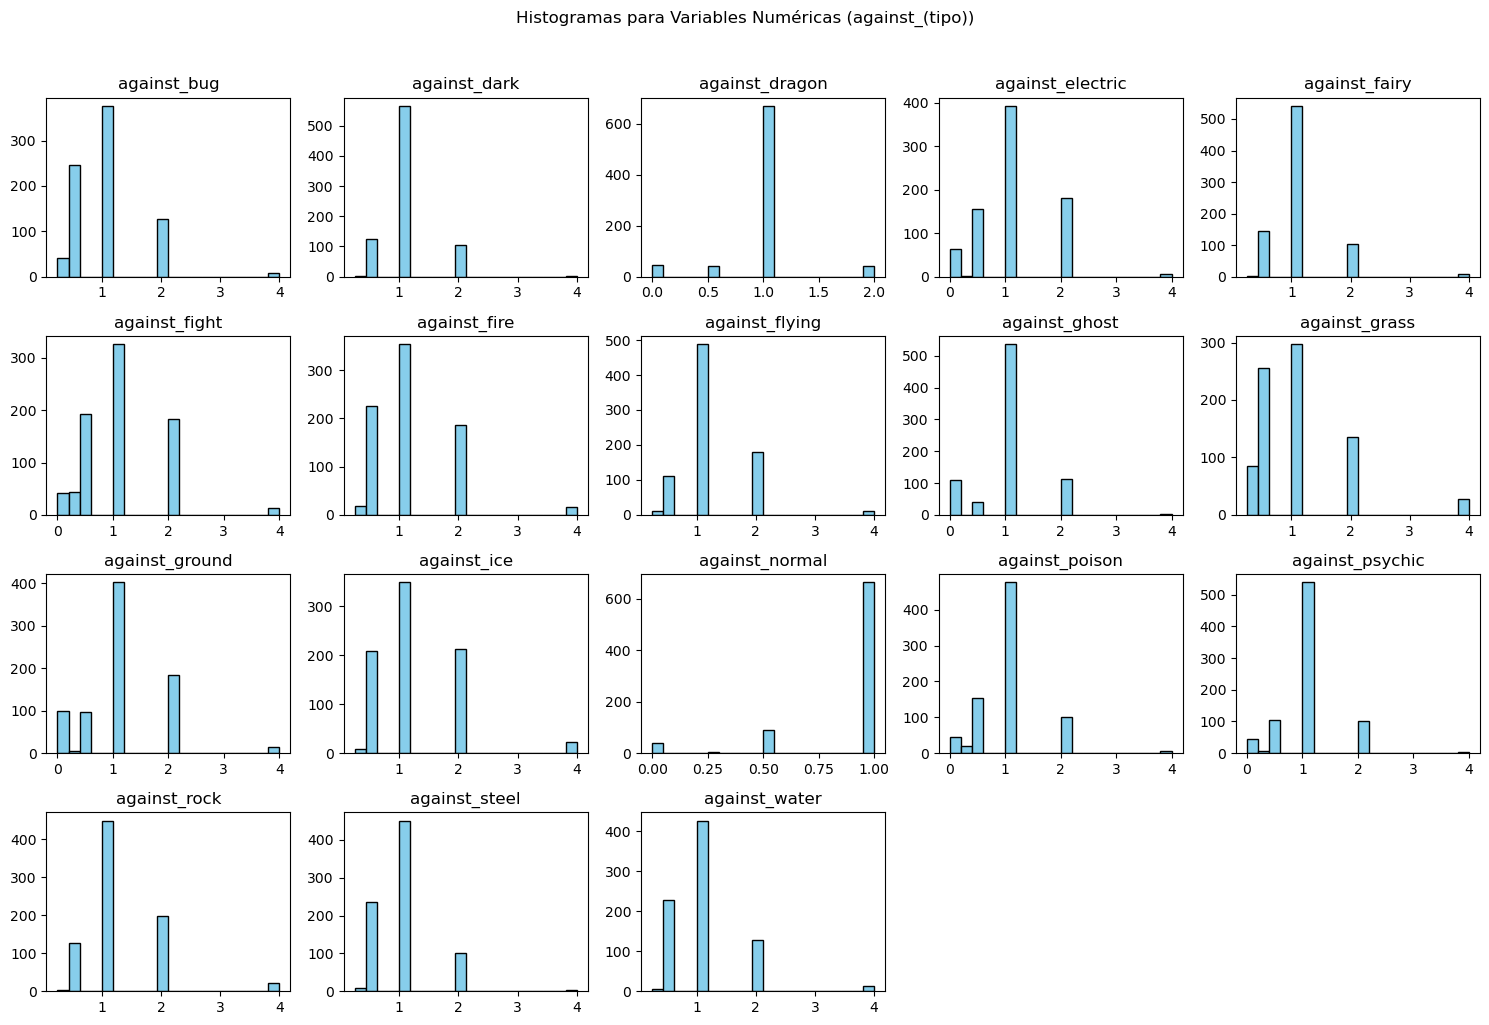

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_against):
    plt.subplot(4, 5, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.suptitle('Histogramas para Variables Numéricas (against_(tipo))', y=1.02)
plt.tight_layout()
plt.show()

Hem pogut observar una mica les relacions entre els tipus, les més semblants són les relacions entre against_dark i against_ghost. Es pot veure tant al heatmap amb un valor de 0.67 de correlació i si  mirem les taules veiem que són bastant semblants. Tot i així, he decidit deixar-ho igual en comptes de juntar-ho. Hem de tenir en compte que hi ha tipus i subtipus de Pokémon i això pot causar diferències, per tant tot i que siguin semblants preferiexo no unir-los i deixar-los per separat.

### Columnes d'estadistiques

Aquestes columnes siguin segurament les més importants a l'hora de decidir si un Pokémon hauría de ser Legendari, per tant s'ha de tractar amb cura i bé.

In [38]:
stat_cols = ['attack','defense','hp','sp_attack','sp_defense','speed','base_total']

In [39]:
# Crea un conjunto de subgráficos
fig = make_subplots(rows=len(stat_cols), cols=1, subplot_titles=stat_cols)

for i, col in enumerate(stat_cols):
    # Añade un histograma para cada estadística
    fig.add_trace(go.Histogram(x=df[col], name=col), row=i+1, col=1)


# Actualiza el diseño de la figura
fig.update_layout(width=800, height=800, template='plotly_white')
fig.update_yaxes(range=[0, 100])
# Muestra la figura
fig.show()

Farem una cerca dels Outliers:

In [40]:
# Selecciona las columnas de estadísticas de Pokémon
stat_cols = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'base_total']

# Crea un conjunto de subgráficos
fig = make_subplots(rows=len(stat_cols), cols=1, subplot_titles=stat_cols)

for i, col in enumerate(stat_cols):
    # Añade un histograma para cada estadística
    fig.add_trace(go.Histogram(x=df[col], name=col), row=i+1, col=1)

 # Añade un boxplot para cada estadística con outliers positivos resaltados
    fig.add_trace(go.Box(x=df[col], name=col, boxpoints='outliers', orientation='h', marker=dict(color='red')), row=i+1, col=1)


# Actualiza el diseño de la figura
fig.update_layout(width=800, height=1200, template='plotly_white')

# Muestra la figura
fig.show()

Els punts destacats són els outliers que destaquen a les estadístiques. Com sol ser definit, un Pokémon legendari sol tenir unes grans estadístiques a almenys a algun estat, o solen tenir més base total. Per això, la  gran majoria d'aquests a les competicions tenen la seva pròpia (Ubers), ja que tenen unes estadístiques molt per sobre. Per tant, aquest Outliers poden indicar Pokémon legendaris, cosa que ens interessa per fer l'estudi.

A continuació, imprimiré per pantalla els 30 pokémon amb més base_total i 10 de cada estadística per poder comprovar si són outliers, o no.

In [41]:
df[["attack", "name","is_legendary"]].sort_values("attack", ascending=False).head(10)

attack       name  is_legendary
213     185  Heracross             0
797     181    Kartana             1
382     180    Groudon             1
383     180   Rayquaza             1
444     170   Garchomp             0
408     165  Rampardos             0
353     165    Banette             0
474     165    Gallade             0
247     164  Tyranitar             0
288     160    Slaking             0

In [42]:
df[["defense", "name","is_legendary"]].sort_values("defense", ascending=False).head(10)

defense       name  is_legendary
305      230     Aggron             0
212      230    Shuckle             0
207      230    Steelix             0
376      200   Regirock             1
712      184    Avalugg             0
90       180   Cloyster             0
79       180    Slowbro             0
410      168  Bastiodon             0
94       160       Onix             0
382      160    Groudon             1

In [43]:
df[["hp", "name","is_legendary"]].sort_values("hp", ascending=False).head(10)

hp       name  is_legendary
241  255    Blissey             0
112  250    Chansey             0
798  223   Guzzlord             1
717  216    Zygarde             1
201  190  Wobbuffet             0
320  170    Wailord             0
593  165  Alomomola             0
142  160    Snorlax             0
486  150   Giratina             1
425  150   Drifblim             0

In [44]:
df[["sp_attack", "name","is_legendary"]].sort_values("sp_attack", ascending=False).head(10)

sp_attack       name  is_legendary
149        194     Mewtwo             1
381        180     Kyogre             1
383        180   Rayquaza             1
64         175   Alakazam             0
795        173  Xurkitree             1
93         170     Gengar             0
719        170      Hoopa             1
645        170     Kyurem             1
180        165   Ampharos             0
281        165  Gardevoir             0

In [45]:
df[["sp_defense", "name","is_legendary"]].sort_values("sp_defense", ascending=False).head(10)

sp_defense       name  is_legendary
212         230    Shuckle             0
377         200     Regice             1
381         160     Kyogre             1
670         154    Florges             0
249         154      Ho-Oh             1
248         154      Lugia             1
475         150  Probopass             0
705         150     Goodra             0
378         150  Registeel             1
379         150     Latias             1

In [46]:
df[["speed", "name","is_legendary"]].sort_values("speed", ascending=False).head(10)

speed        name  is_legendary
385    180      Deoxys             1
290    160     Ninjask             0
794    151   Pheromosa             1
100    150   Electrode             0
141    150  Aerodactyl             0
64     150    Alakazam             0
616    145    Accelgor             0
253    145    Sceptile             0
14     145    Beedrill             0
149    140      Mewtwo             1

In [47]:
df[["base_total", "name","is_legendary"]].sort_values("base_total", ascending=False).head(30)

base_total       name  is_legendary
149         780     Mewtwo             1
383         780   Rayquaza             1
382         770    Groudon             1
381         770     Kyogre             1
492         720     Arceus             1
717         708    Zygarde             1
380         700     Latios             1
372         700  Salamence             0
247         700  Tyranitar             0
444         700   Garchomp             0
718         700    Diancie             1
379         700     Latias             1
375         700  Metagross             0
645         700     Kyurem             1
719         680      Hoopa             1
716         680    Yveltal             1
715         680    Xerneas             1
248         680      Lugia             1
643         680     Zekrom             1
791         680     Lunala             1
790         680   Solgaleo             1
642         680   Reshiram             1
249         680      Ho-Oh             1
482         680     Dialga             1
486         680   Giratina             1
483         680     Palkia             1
288         670    Slaking             0
485         670  Regigigas             1
657         640   Greninja             0
129         640   Gyarados             0

Podem observar, que la majoria  de Pokémon que destaquen a una característica no són legendaris, però els que destaquen en base_total si ho són, ja que 23 dels 30 són legendaris. Per tant, hem de tenir en compte que els outliers positius no són sempre legendaris en les estadístiques individuals, però si en les generals.

### Altres columnes numèriques

In [48]:
print("Other numerical columns: ",list(set(col_num[18:]) - set(stat_cols)))

Other numerical columns:  ['experience_growth', 'generation', 'base_happiness', 'percentage_male', 'capture_rate', 'is_legendary', 'height_m', 'base_egg_steps', 'weight_kg']


Farem el mateix que als altres apartats, anirem columna per columna i escollirem les necessàries per poder aplicar bé els algorismes d'aprenentatge.

#### Percentage Male

Primer de tot, anem a veure com són les dades d'aquesta columna per fer-nos una idea.

In [49]:
print(df['percentage_male'])

0      88.1
1      88.1
2      88.1
3      88.1
4      88.1
       ... 
796     NaN
797     NaN
798     NaN
799     NaN
800     NaN
Name: percentage_male, Length: 801, dtype: float64


Sembla que tenim el percentatge de que un determinat Pokémon sigui Mascle i també tenim NaNs, què signifiquen les NaNs?

In [50]:
df[df["pokedex_number"] == 801][["name", "is_legendary", "percentage_male"]]

name  is_legendary  percentage_male
800  Magearna             1              NaN

Les NaNs sembla que són als Pokémon que no tenen gènere. Aquests Pokémon, podem saber de forma general que solen ser legendaris però també hi ha altres Pokémon (Porygon) que no en tenen. Anem a fer una comparació de gènere entre el nombre de Pokèmons legendaris amb i sense gènere amb els normals.

In [51]:
no_genre = df[df.percentage_male.isnull()][["name", "is_legendary"]]
no_genre.is_legendary.value_counts()

is_legendary
1    63
0    35
Name: count, dtype: int64

Dels Pokémon sense gènere, tenim 63 legendaris i 35 no legendaris. Podem fer una comparació sobre quants Pokémon legendari  tenen gènere i quants no? Aixó podrem saber si és una mostra significativa o no.

In [52]:
legendari = df[df.is_legendary == 1][["name","percentage_male"]]
legendari.count()

name               70
percentage_male     7
dtype: int64

De 70 legendaris, tenim 7 amb gènere, anem a veure quins són:

In [53]:
legendari[~legendari.percentage_male.isnull()]

name  percentage_male
379     Latias              0.0
380     Latios            100.0
484    Heatran             50.0
487  Cresselia              0.0
640   Tornadus            100.0
641  Thundurus            100.0
644   Landorus            100.0

D'aquí podem extreure el següent:

    -Latias sempre és de gènere femení i Latios Masculí, té senti ja que són dos Pokémon complementaris i que es basen en aquesta ideia.
    - Heatran no  entenc per què té un 50% de ser d'un dels gèneres, ja que és un Pokémon que no pot criar igualment.
    - Cresselia és sempre femení, també té sentit ja que és un tret que ens donen a conèixer als jocs..
    - Tornadus, Thundurus i Landorus: Aquest cas, tampoc sabría per què sempre són mascles, segurament sigui per mantenir la estètica que tenen els Pokémon i tenir una cohesió. Tot i que sería el mateix que si no tinguessin gènere.

Finalment, és necessària aquesta columna? Sincerament jo crec que no. Com podem donar-li un valor a les NaNs dels gèneres, no podem posar 0 perquè seria sempre femení, al ser un percentatge de ser mascle. Podria mapejar-les i fer com gènere però tampoc tindria sentit. El millor en aquest cas és no utilitzar la columna, ja que de 70 legendaris, 63 no tenen gènere i són valors bastant únics, millor descartar-los

In [54]:
col_num.remove("percentage_male")

#### Experience Growth

In [55]:
df[["experience_growth"]]

experience_growth
0              1059860
1              1059860
2              1059860
3              1059860
4              1059860
..                 ...
796            1250000
797            1250000
798            1250000
799            1250000
800            1250000

[801 rows x 1 columns]

In [56]:
# Crear una nueva columna para distinguir entre legendarios y no legendarios
df['legendary_category'] = df['is_legendary'].apply(lambda x: 'Legendary' if x == 1 else 'Non-Legendary')

# Crear el gráfico de dispersión
fig = px.scatter(df, x='experience_growth', color='legendary_category', hover_data=['name'],
                 title='Distribución de Crecimiento de Experiencia',
                 labels={'experience_growth': 'Crecimiento de Experiencia'},
                 category_orders={'legendary_category': ['Non-Legendary', 'Legendary']},
                 width=800, height=500)

# Mostrar el gráfico
fig.show()

Tots els Pokémon legendaris tenen el mateix creixement d'experiència menys 3 (Mew, Celebi i Shaymin). Millor descartar-ho ja que són valors molt únics i pot empitjorar l'entrenament.

In [57]:
col_num.remove("experience_growth")

####  Base Happiness

Base_happiness representa la felicitat base que tindrà un Pokémon, és un paràmetre interessant ja que podrem veure la distribució d'aquesta, però segurament hauré de treure la columna ja que exceptuant alguns Pokémon que evolucionen per felicitat i  altres, molts tindran un valor igual.

In [58]:
df[["base_happiness"]]

base_happiness
0                70
1                70
2                70
3                70
4                70
..              ...
796               0
797               0
798               0
799               0
800               0

[801 rows x 1 columns]

In [59]:
# Crear el gráfico de dispersión
fig = px.scatter(df, x='base_happiness', y=df.index, color='legendary_category', 
                 symbol='legendary_category', 
                 hover_data=['name'],
                 title='Distribución de Base Happiness',
                 labels={'base_happiness': 'Base Happiness'},
                 category_orders={'legendary_category': ['Non-Legendary', 'Legendary']},
                 width=800, height=500)

# Mostrar el gráfico
fig.show()

In [60]:
# Contar Pokémon no legendarios con base_happiness igual a 70
no_legendarios_70 = df[(df['is_legendary'] == 0) & (df['base_happiness'] == 70)].shape[0]

# Contar Pokémon legendarios con base_happiness igual a 0
legendarios_0 = df[(df['is_legendary'] == 1) & (df['base_happiness'] == 0)].shape[0]

# Mostrar el resultado
print("No Legendarios con base_happiness=70:", no_legendarios_70)
print("Legendarios con base_happiness=0:", legendarios_0)

No Legendarios con base_happiness=70: 661
Legendarios con base_happiness=0: 33


Observem que no hi ha gaire variança entre les dades, ja que hi ha molts No-legendaris amb base 70 i la meitat dels legendaris la tenen a 0. Per tant, millor eliminar aquesta columna

In [61]:
col_num.remove("base_happiness")

#### Base egg steps

In [62]:
# Crear el gráfico de caja
fig = px.box(df, x='is_legendary', y='base_egg_steps', points="all", 
             title='Distribución de Egg Steps para Pokémon Legendarios y No Legendarios',
             labels={'is_legendary': 'Legendary', 'base_egg_steps': 'Egg Steps'},
             category_orders={'is_legendary': [0, 1]},
             width=800, height=500)

# Mostrar el gráfico
fig.show()

Aquesta columna tampoc ens aporta suficient informació retllevant, ja que la majoria de egg steps pels legendaris està a  +30K de passes i dels no legendaris està entre 2,5 i 10K. Per tant, millor descartar-la per la vaixa variabilitat.

In [63]:
col_num.remove("base_egg_steps")

#### Weight and Height

Aquesta columna serà segurament irrellevant, ja que hi ha Pokémon legendaris grans, petits... No venen marcats per tamany, però per si de cas anem a veure-la i després decidim:

In [64]:
df[["weight_kg", "height_m"]].describe()

weight_kg    height_m
count  781.000000  781.000000
mean    61.378105    1.163892
std    109.354766    1.080326
min      0.100000    0.100000
25%      9.000000    0.600000
50%     27.300000    1.000000
75%     64.800000    1.500000
max    999.900000   14.500000

In [65]:
print("NaN en weight_kg:", df['weight_kg'].isna().sum())
print("NaN en height_m:", df['height_m'].isna().sum())

NaN en weight_kg: 20
NaN en height_m: 20


In [66]:
# Imprimir Pokémon con NaN en weight_kg
pokemon_nan_weight = df[df['weight_kg'].isna()]
print("Pokémon con NaN en weight_kg:")
print(pokemon_nan_weight[['name', 'weight_kg']])

# Imprimir Pokémon con NaN en height_m
pokemon_nan_height = df[df['height_m'].isna()]
print("\nPokémon con NaN en height_m:")
print(pokemon_nan_height[['name', 'height_m']])

Pokémon con NaN en weight_kg:
          name  weight_kg
18     Rattata        NaN
19    Raticate        NaN
25      Raichu        NaN
26   Sandshrew        NaN
27   Sandslash        NaN
36      Vulpix        NaN
37   Ninetales        NaN
49     Diglett        NaN
50     Dugtrio        NaN
51      Meowth        NaN
52     Persian        NaN
73     Geodude        NaN
74    Graveler        NaN
75       Golem        NaN
87      Grimer        NaN
88         Muk        NaN
102  Exeggutor        NaN
104    Marowak        NaN
719      Hoopa        NaN
744   Lycanroc        NaN

Pokémon con NaN en height_m:
          name  height_m
18     Rattata       NaN
19    Raticate       NaN
25      Raichu       NaN
26   Sandshrew       NaN
27   Sandslash       NaN
36      Vulpix       NaN
37   Ninetales       NaN
49     Diglett       NaN
50     Dugtrio       NaN
51      Meowth       NaN
52     Persian       NaN
73     Geodude       NaN
74    Graveler       NaN
75       Golem       NaN
87      Grimer     

Trobem diferentes NaNs que podem fer la mitja de  la columna per comparar

In [67]:
# Calcular la media de height_m y weight_kg
mean_height = df['height_m'].mean()
mean_weight = df['weight_kg'].mean()

# Llenar NaN con la media correspondiente
df['height_m'].fillna(mean_height, inplace=True)
df['weight_kg'].fillna(mean_weight, inplace=True)


In [68]:
# Gráfico de caja para height_m
fig_height = px.box(df, x='is_legendary', y='height_m', points="all",
                    title='Distribución de Height para Pokémon Legendarios y No Legendarios',
                    labels={'is_legendary': 'Legendary', 'height_m': 'Height'},
                    category_orders={'is_legendary': [0, 1]},
                    width=800, height=500)

# Gráfico de caja para weight_kg
fig_weight = px.box(df, x='is_legendary', y='weight_kg', points="all",
                    title='Distribución de Weight para Pokémon Legendarios y No Legendarios',
                    labels={'is_legendary': 'Legendary', 'weight_kg': 'Weight'},
                    category_orders={'is_legendary': [0, 1]},
                    width=800, height=500)

# Mostrar los gráficos
fig_height.show()
fig_weight.show()

Decidirem deixar les dues columnes perquè els valors son suficientment diferents i els Outliers són interessants.

In [69]:
print("Other numerical columns: ",list(set(col_num[18:]) - set(stat_cols)))

Other numerical columns:  ['generation', 'capture_rate', 'is_legendary', 'height_m', 'weight_kg']


Ens queda per mirar la generació, is_legendary ho borrarem al final per fer l'entrenament bé.

#### Generació

Primer, imprimerm un gràfic del nombre de legendaris per generació

In [70]:
# Agrupar por generación y contar el número de Pokémon legendarios
legendary_by_generation = df[df['is_legendary'] == 1].groupby('generation').size().reset_index(name='count')

# Crear el gráfico de barras
fig_legendary_by_generation = px.bar(legendary_by_generation, x='generation', y='count',
                                     title='Número de Pokémon Legendarios por Generación',
                                     labels={'generation': 'Generación', 'count': 'Número de Pokémon Legendarios'},
                                     width=800, height=500)

# Mostrar el gráfico
fig_legendary_by_generation.show()

Seguidament, una comparació entre el nombre de Pokémon per generació i els legendaris:

In [71]:
# Agrupar por generación y contar el número de Pokémon legendarios y no legendarios
pokemon_by_generation = df.groupby(['generation', 'is_legendary']).size().reset_index(name='count')

# Crear el gráfico de barras apiladas
fig_pokemon_by_generation = px.bar(pokemon_by_generation, x='generation', y='count',
                                   color='is_legendary', barmode='stack',
                                   title='Número de Pokémon por Generación (Legendarios y No Legendarios)',
                                   labels={'generation': 'Generación', 'count': 'Número de Pokémon'},
                                   color_discrete_map={0: 'blue', 1: 'orange'},
                                   width=800, height=500)

# Mostrar el gráfico
fig_pokemon_by_generation.show()

Com que és bastant irregular i no aporta molta informació, la 7a generació té  17 legendaris i 63 propis, és una gran diferència a la resta o la 6a que en té només 6 legendaris. Crec que el millor seria ignorar-ho i deixar una probabilitat igual de legendari a totes les generacions.

In [72]:
col_num.remove("generation")

In [73]:
col_num.remove("is_legendary")

Bé, veiem com ens queda col_num:

In [74]:
print(col_num)

['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_total', 'capture_rate', 'defense', 'height_m', 'hp', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']


Perfecte!

Ara anem a fer una matriu de correlació per, descartar finalment les columnes que no siguin retllevants.

In [75]:
cols = col_num + col_obj
X = df[cols]

In [76]:
print(df[cols])

     against_bug  against_dark  against_dragon  against_electric  \
0           1.00           1.0             1.0               0.5   
1           1.00           1.0             1.0               0.5   
2           1.00           1.0             1.0               0.5   
3           0.50           1.0             1.0               1.0   
4           0.50           1.0             1.0               1.0   
..           ...           ...             ...               ...   
796         0.25           1.0             0.5               2.0   
797         1.00           1.0             0.5               0.5   
798         2.00           0.5             2.0               0.5   
799         2.00           2.0             1.0               1.0   
800         0.25           0.5             0.0               1.0   

     against_fairy  against_fight  against_fire  against_flying  \
0              0.5            0.5           2.0             2.0   
1              0.5            0.5           2.0  

M'ha donat error al fer la correlació, ja que tenim variables categòriques, farem una codificació one-hot per poder incloure-les al heatmap.

In [77]:
from sklearn.preprocessing import OneHotEncoder
# Codificación one-hot para las columnas categóricas
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_types = encoder.fit_transform(X[['type1', 'type2']])

# Obtener los nombres de las nuevas columnas
encoded_feature_names = encoder.get_feature_names_out(['type1', 'type2'])

# Crear un DataFrame con las columnas codificadas
encoded_types_df = pd.DataFrame(encoded_types, columns=encoded_feature_names)

# Concatenar las columnas numéricas con las codificadas
X_encoded = pd.concat([X.select_dtypes(include=['number']), encoded_types_df], axis=1)

# Calcular la correlación
corr = X_encoded.corr()

# Visualizar el heatmap
px.imshow(corr, color_continuous_scale=px.colors.sequential.Viridis)

C:\Users\victo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Tot i que es vegi difús, si fem Zoom podem veure que al mapa de calor destaquen les correlacions entre base_total i la resta d'estadístiques, per tant, el millor és treure-les i deixar només  base_total.

In [78]:
for col in stat_cols:
    if col != 'base_total':
        col_num.remove(col)

In [79]:
print(col_num)

['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'base_total', 'capture_rate', 'height_m', 'weight_kg']


In [80]:
cols = col_num + col_obj
X = df[cols]
print(cols)

['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'base_total', 'capture_rate', 'height_m', 'weight_kg', 'type1', 'type2']


# Selecció de model

En aquest anàlisi, explorarem l'eficàcia de diversos algoritmes de clustering utilitzant la mètrica de silueta. La mètrica de silueta proporciona una mesura de què tan ben definits estan els clusters en comparació amb altres clusters potencials. Com més a prop de 1 sigui el valor de la mètrica de silueta, millor està definit el cluster, mentre que els valors negatius indiquen que un punt pot haver estat assignat al cluster equivocat. Aquesta mètrica és particularment útil per avaluar la cohesió i separació dels clusters en conjunts de dades de alta dimensionalitat.

Els algoritmes de clustering que avaluarem són:

    K-Means: Un algoritme de particionament que assigna punts de dades a clusters basant-se en la minimització de la variància intra-cluster.

    DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Un algoritme que identifica clusters basant-se en la densitat de punts de dades al seu voltant, adequat per a conjunts de dades amb densitats variables.

    Agglomerative Clustering: Un enfocament jeràrquic que construeix clusters fusionant o dividint iterativament els punts de dades.

    Bayesian Gaussian Mixture: Un model probabilístic que assumeix que les dades provenen d'una barreja de distribucions gaussianes, utilitzant inferència bayesiana per assignar punts a clusters.
    
Explorarem com cada un d'aquests models es desempeny en termes de la mètrica de silueta, proporcionant una perspectiva sobre la seva capacitat per identificar clusters ben definits en conjunts de dades complexos.

In [81]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
import numpy as np
os.environ['OMP_NUM_THREADS'] = '4'


# Definir las características
X = df[cols]

# Codificación one-hot de las columnas categóricas (type1 y type2)
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_types = encoder.fit_transform(df[['type1', 'type2']])
encoded_types_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1', 'type2']))

# Concatenar las columnas numéricas con las codificadas
X_encoded = pd.concat([X.select_dtypes(include=['number']), encoded_types_df], axis=1)

# Escalar las características para normalizarlas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Definir los modelos
kmeans = KMeans(n_clusters=2, n_init=10 ,random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agglomerative = AgglomerativeClustering(n_clusters=2)
bayesian_gaussian = BayesianGaussianMixture(n_components=30, n_init=10, random_state=42)
models = {
    'K-Means': kmeans,
    'DBSCAN': dbscan,
    'Agglomerative' : agglomerative,
    'Bayesian Gaussian Mixture': bayesian_gaussian,
    
}

# Evaluar cada modelo y calcular la métrica de silueta
for model_name, model in models.items():   
    if model_name == 'Bayesian Gaussian Mixture':
        # BayesianGaussianMixture no tiene labels_ directamente, pero puede proporcionar predicciones
        labels = model.fit_predict(X_scaled)
    else:
        model.fit(X_scaled)
        labels = model.labels_
    
    # Utilizar la métrica de silueta para evaluar el rendimiento del clustering
    silhouette_avg = silhouette_score(X_scaled, labels)
    
    print(f'Model: {model_name}')
    print(f'Silhouette Score: {silhouette_avg}')
    print('\n')


Model: K-Means
Silhouette Score: 0.17282653103062653


Model: DBSCAN
Silhouette Score: -0.20887243812205816


Model: Agglomerative
Silhouette Score: 0.10365359550226436


Model: Bayesian Gaussian Mixture
Silhouette Score: 0.3274826266083088




En aquesta avaluació dels diferents models de clustering utilitzant la mètrica de silueta, es destaquen les següents conclusions:

       K-Means: Amb un Silhouette Score de 0.17, el model K-Means presenta una cohesió moderada dels seus clusters. Aquest resultat indica que els clusters no estan molt ben definits, i pot ser necessari ajustar els paràmetres o considerar altres models.

    DBSCAN: Amb un Silhouette Score negatiu de -0.21, DBSCAN mostra un rendiment deficitori en la identificació de clusters amb densitats variables. La naturalesa de DBSCAN pot no ser adequada per a aquest conjunt de dades específic.

    Agglomerative Clustering: Amb un Silhouette Score de 0.10, Agglomerative Clustering indica una cohesió encara més baixa dels clusters. Aquest model podria no ser la millor opció per a aquestes dades, ja que els clusters no estan ben diferenciats.

    Bayesian Gaussian Mixture: Amb el màxim Silhouette Score de 0.33, Bayesian Gaussian Mixture destaca com el model més eficaç en la formació de clusters amb una bona separació. Aquesta opció podria ser preferible quan es busca una millor definició dels clusters en conjunts de dades més complexos.

# Entrenament

Com que hem tingut dos models en positiu, primer farem el K-Means i després el compararem amb el resultat del Bayesian Gaussian Mixture i veurem quin es podria adaptar més a la realitat. També realitzo això per fer un pas extra ja que trobo suficientment interessant el fet de probar dos models diferents

## K-MEANS

In [82]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import plotly.express as px
os.environ['OMP_NUM_THREADS'] = '4'

# cols representa las columnas relevantes para el clustering
cols = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'base_total', 'capture_rate', 'height_m', 'weight_kg', 'type1', 'type2']

# Filtrar el DataFrame para obtener solo las columnas seleccionadas
X = df[cols]

# Codificación one-hot de las columnas categóricas (type1 y type2)
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_types = encoder.fit_transform(df[['type1', 'type2']])
encoded_types_df = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['type1', 'type2']))

# Concatenar las columnas numéricas con las codificadas
X_encoded = pd.concat([X.select_dtypes(include=['number']), encoded_types_df], axis=1)

# Escalar las características para normalizarlas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Aplicar K-Means Clustering con un número de clusters apropiado
n_clusters = 2 
kmeans = KMeans(n_clusters=n_clusters, n_init=10 ,random_state=42)
X_clusters = kmeans.fit_predict(X_scaled)

# Añadir una columna al DataFrame con la asignación de cluster
df['cluster'] = X_clusters

# Calcular la distancia de cada punto al centroide de su cluster
distances = kmeans.transform(X_scaled)
df['distance_to_centroid'] = distances.min(axis=1)

# Definir un umbral para considerar los Pokémon legendarios
umbral = 8.8  # Ajusta según tus necesidades

# Filtrar los Pokémon con distancias más grandes
legendary_candidates_kmeans = df[(df['cluster'] == 1) & (df['distance_to_centroid'] > umbral)]
# Visualizar el resultado
fig = px.scatter(df, x='distance_to_centroid', y='cluster', color='cluster', hover_name='name', title='K-Means Clustering Result')
fig.show()

# Configurar Pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar los Pokémon que podrían ser considerados legendarios
print("Pokémon que podrían ser considerados legendarios:")
print(legendary_candidates_kmeans[['name', 'cluster', 'distance_to_centroid']])

Pokémon que podrían ser considerados legendarios:
           name  cluster  distance_to_centroid
73      Geodude        1              8.986004
80    Magnemite        1              9.026112
94         Onix        1             11.073712
110     Rhyhorn        1             10.804269
111      Rhydon        1             10.749251
137     Omanyte        1              8.990214
138     Omastar        1              8.879237
139      Kabuto        1              8.976846
140    Kabutops        1              8.867646
207     Steelix        1             11.168510
218    Magcargo        1             10.249054
221     Corsola        1              9.108716
247   Tyranitar        1              9.706214
291    Shedinja        1              9.022279
301     Sableye        1              9.974760
303        Aron        1             10.498490
304      Lairon        1             10.309562
305      Aggron        1             10.657646
346     Anorith        1             13.485167
347     Ar

Pokémon que podrían ser considerados legendarios con K-Means:


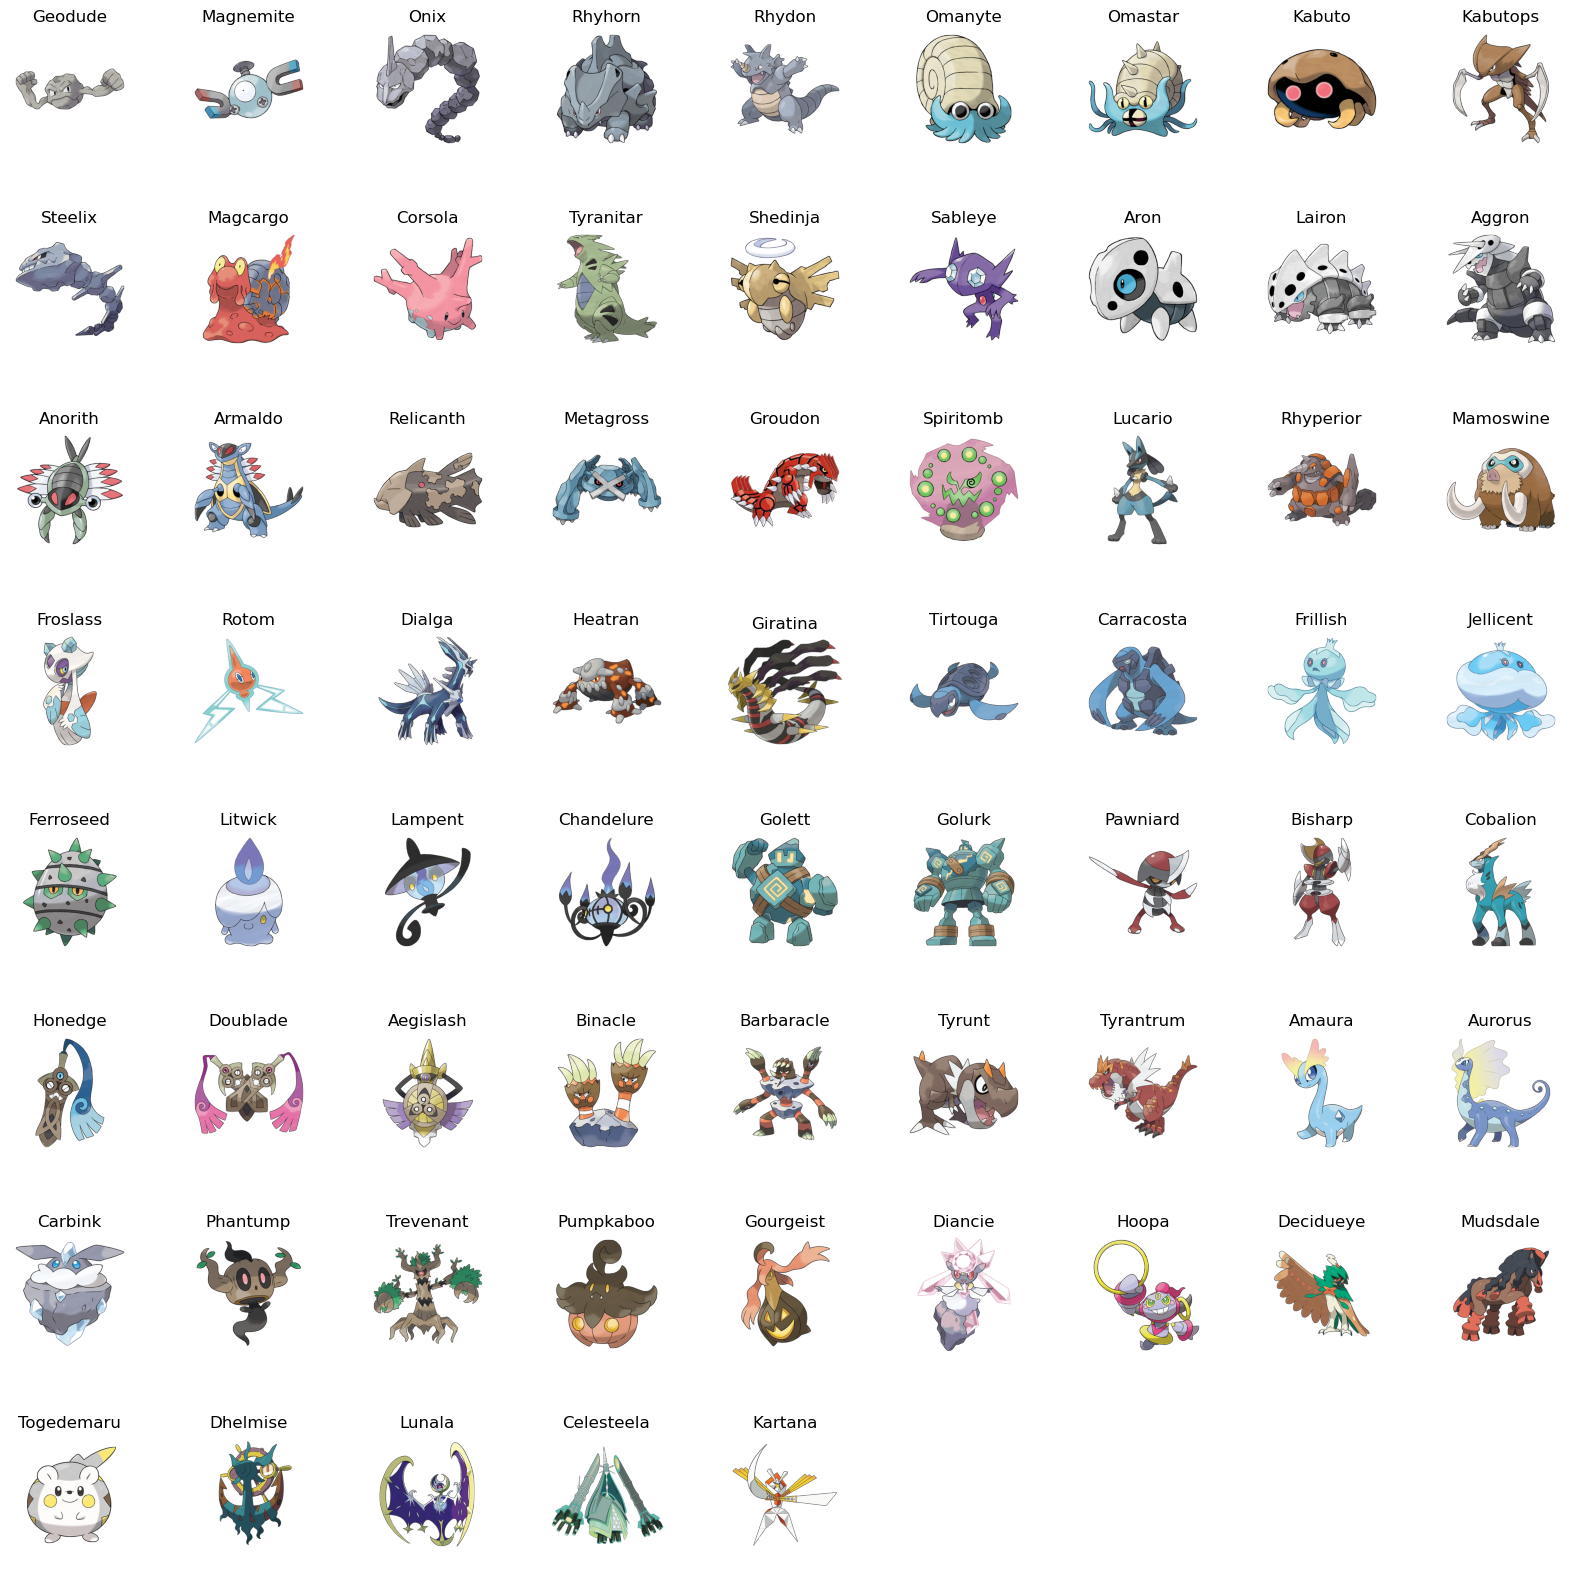

In [83]:
from IPython.display import Image, display
import os
import matplotlib.pyplot as plt
import numpy as np

# Ruta a la carpeta de imágenes
img_folder = "img"

# Obtener el número de filas y columnas para la disposición de la tabla
num_rows = 8
num_cols = 9

# Mostrar imágenes de los Pokémon legendarios encontrados con K-Means
print("Pokémon que podrían ser considerados legendarios con K-Means:")
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for idx, (index, row) in enumerate(legendary_candidates_kmeans[['name', 'cluster', 'distance_to_centroid']].iterrows()):
    pokemon_name = row['name']
    image_path = os.path.join(img_folder, f"{pokemon_name}.png")

    # Comprobar si la imagen existe antes de intentar mostrarla
    if os.path.exists(image_path):
        image = plt.imread(image_path)
        ax[idx//num_cols, idx%num_cols].imshow(image)
        ax[idx//num_cols, idx%num_cols].axis("off")
        ax[idx//num_cols, idx%num_cols].set_title(f"{pokemon_name}")
    else:
        print(f"Imagen no encontrada para {pokemon_name}")

# Ajustar el espaciado entre las subgráficas
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Eliminar los ejes adicionales si hay menos Pokémon que celdas en la tabla
if len(legendary_candidates_kmeans) < num_rows * num_cols:
    for idx in range(len(legendary_candidates_kmeans), num_rows*num_cols):
        ax.flatten()[idx].axis('off')


plt.show()



In [84]:
from sklearn.metrics import silhouette_score

# Calcular silhouette score para K-Means
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'K-Means Silhouette Score: {silhouette_avg}')


K-Means Silhouette Score: 0.17282653103062653


## Bayesian Gaussian Mixture

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import BayesianGaussianMixture

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

prep_pipe = ColumnTransformer([
    ('cat', cat_pipe, col_obj),
    ('num', num_pipe, col_num),
])

X_prep = prep_pipe.fit_transform(X)

gm = BayesianGaussianMixture(n_components=30, n_init=10, random_state=42)
gm.fit(X_prep)

print("Our algorithm converged?")
print(gm.converged_)

Our algorithm converged?
True


C:\Users\victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



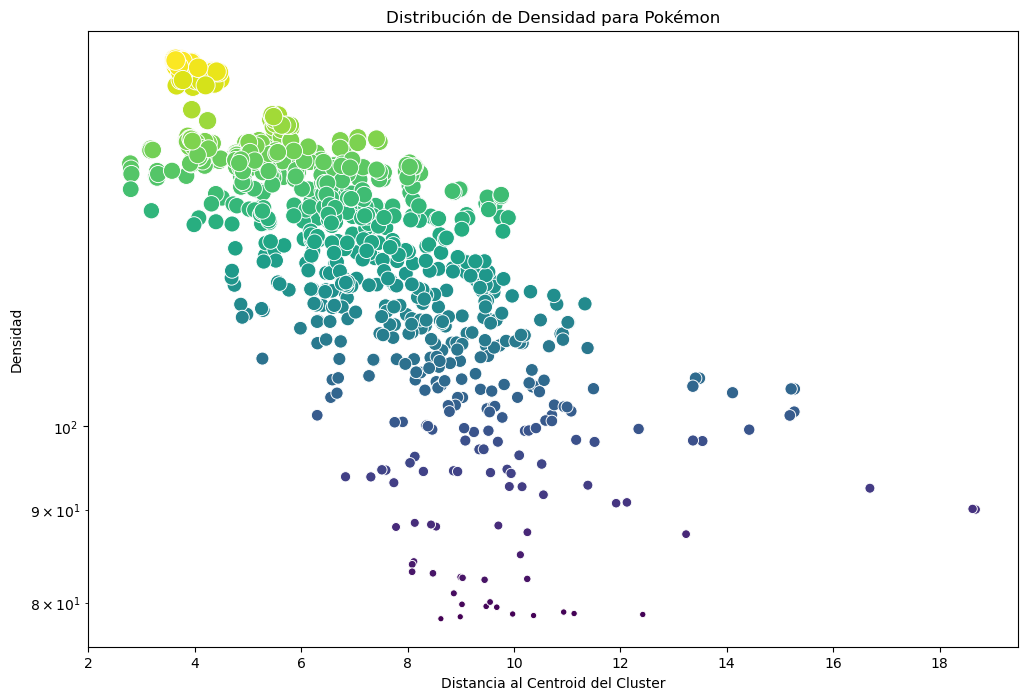

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula las densidades
densities = gm.score_samples(X_prep)

# Establece un umbral para considerar los Pokémon legendarios
density_threshold = np.percentile(densities, 9)

# Encuentra los índices de los Pokémon que están por debajo del umbral
anomalies = np.where(densities < density_threshold)

# Agregar las densidades al DataFrame
df['density'] = densities

legendary_candidates_bayesian = df.iloc[anomalies]

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='distance_to_centroid', y='density', hue='density', palette='viridis', size='density', sizes=(20, 200))
plt.title('Distribución de Densidad para Pokémon')
plt.xlabel('Distancia al Centroid del Cluster')
plt.ylabel('Densidad')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.legend().remove()  # Para quitar la leyenda, ya que el tamaño ya codifica la densidad
plt.show()




Pokémon que podrían ser considerados legendarios con Gaussian Mixture:


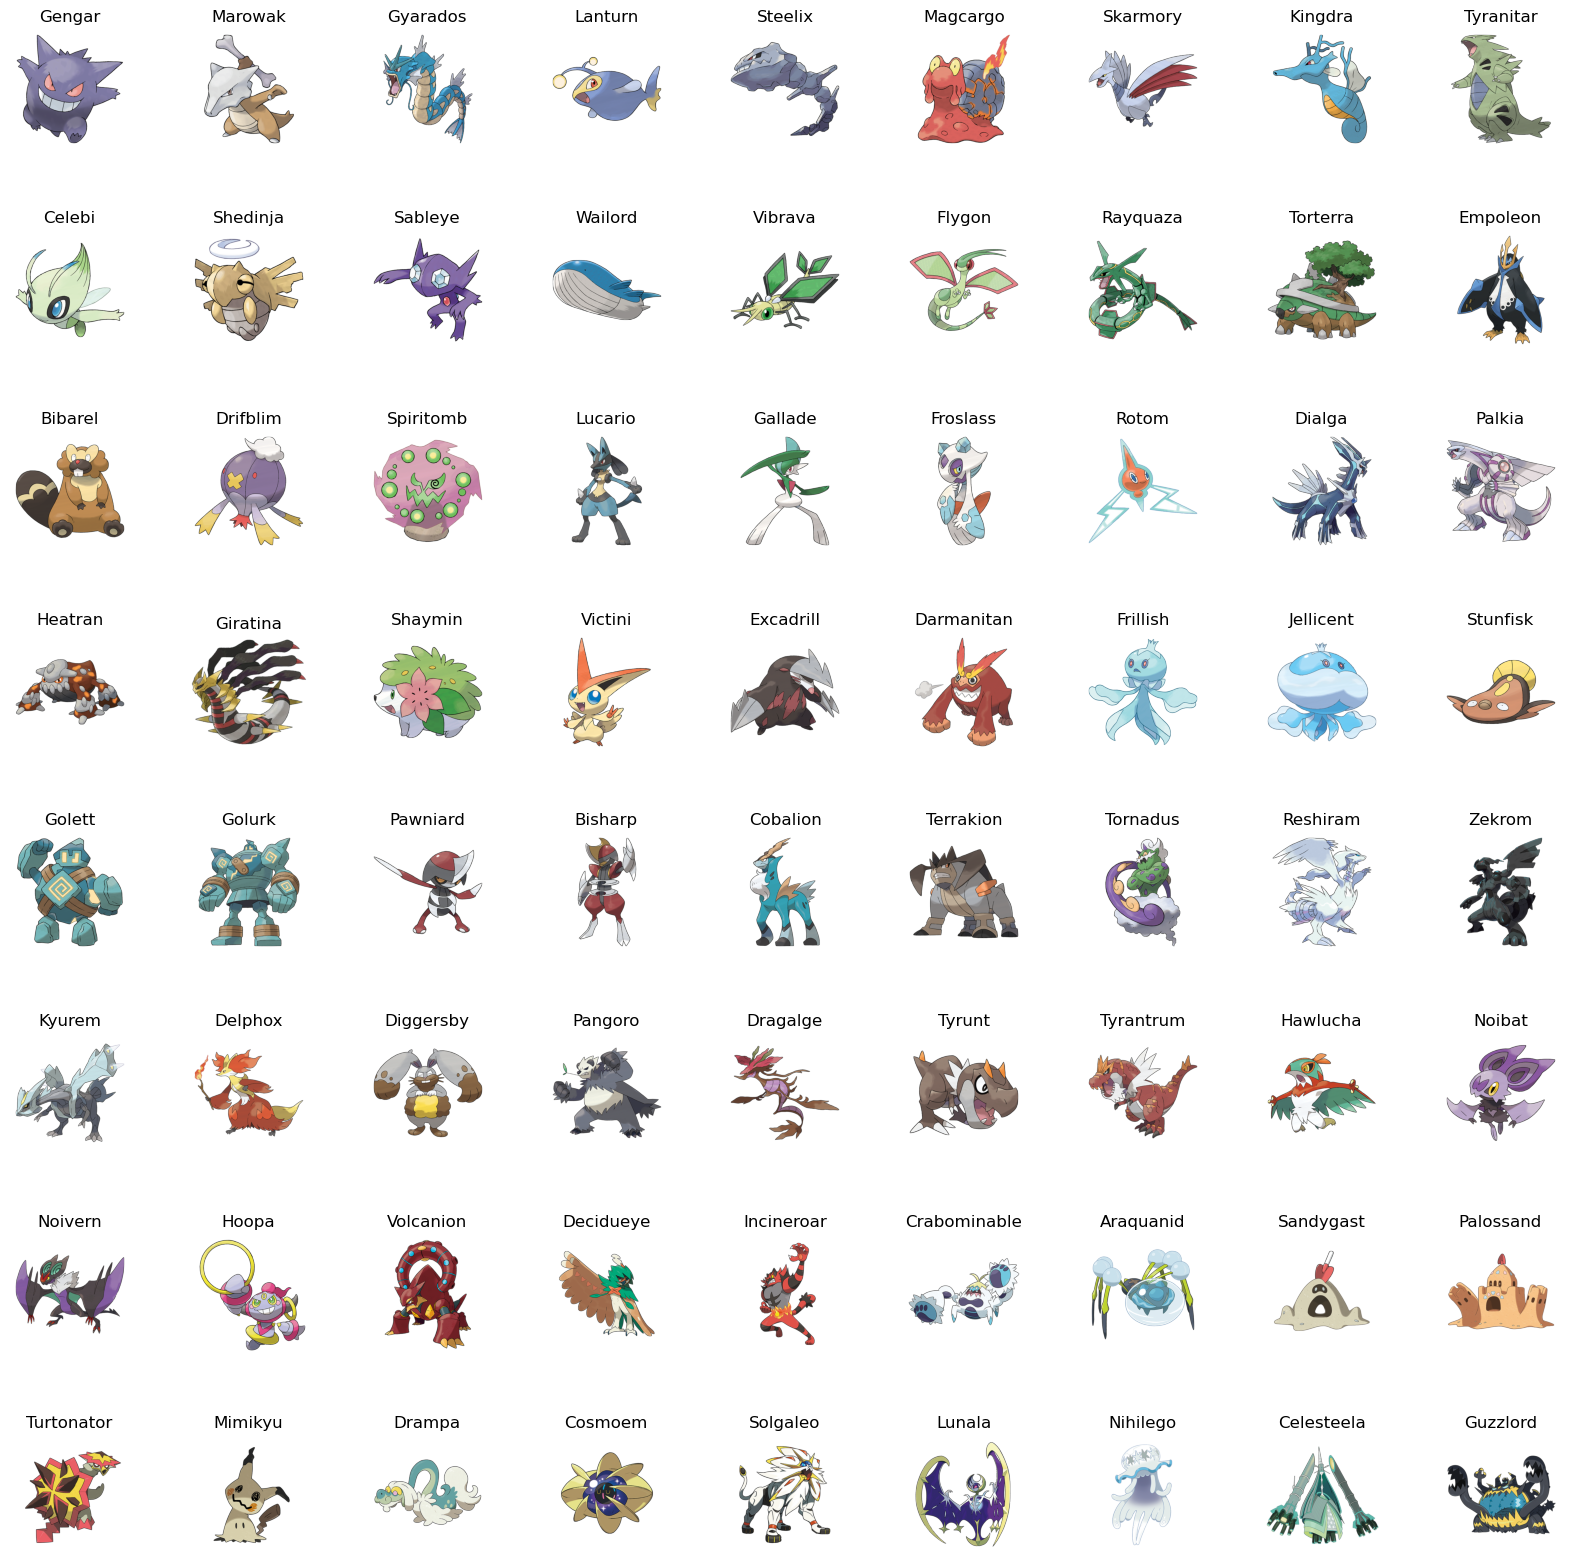

In [87]:
from IPython.display import Image, display
import os
import matplotlib.pyplot as plt
import numpy as np

# Ruta a la carpeta de imágenes
img_folder = "img"

# Obtener el número de filas y columnas para la disposición de la tabla
num_rows = 8
num_cols = 9

# Mostrar imágenes de los Pokémon legendarios encontrados con Gaussian Mixture
print("Pokémon que podrían ser considerados legendarios con Gaussian Mixture:")
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for idx, (index, row) in enumerate(legendary_candidates_bayesian[['name', 'distance_to_centroid']].iterrows()):
    pokemon_name = row['name']
    image_path = os.path.join(img_folder, f"{pokemon_name}.png")

    # Comprobar si la imagen existe antes de intentar mostrarla
    if os.path.exists(image_path):
        image = plt.imread(image_path)
        ax[idx//num_cols, idx%num_cols].imshow(image)
        ax[idx//num_cols, idx%num_cols].axis("off")
        ax[idx//num_cols, idx%num_cols].set_title(f"{pokemon_name}")
    else:
        print(f"Imagen no encontrada para {pokemon_name}")

# Ajustar el espaciado entre las subgráficas
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Eliminar los ejes adicionales si hay menos Pokémon que celdas en la tabla
if len(legendary_candidates_bayesian) < num_rows * num_cols:
    for idx in range(len(legendary_candidates_bayesian), num_rows*num_cols):
        ax.flatten()[idx].axis('off')

plt.show()


In [88]:
from sklearn.metrics import silhouette_score

# Obtener las etiquetas de cluster
labels_bayesian = gm.predict(X_prep)

# Calcular silhouette score para Bayesian Gaussian Mixture
silhouette_avg_bayesian = silhouette_score(X_prep, labels_bayesian)
print(f'Bayesian Gaussian Mixture Silhouette Score: {silhouette_avg_bayesian}')


Bayesian Gaussian Mixture Silhouette Score: 0.2541420797778939


A continuació imprimirem els Pokémon que tenen en comú els 2 models:

Pokémon legendarios comunes entre K-Means y Gaussian Mixture:


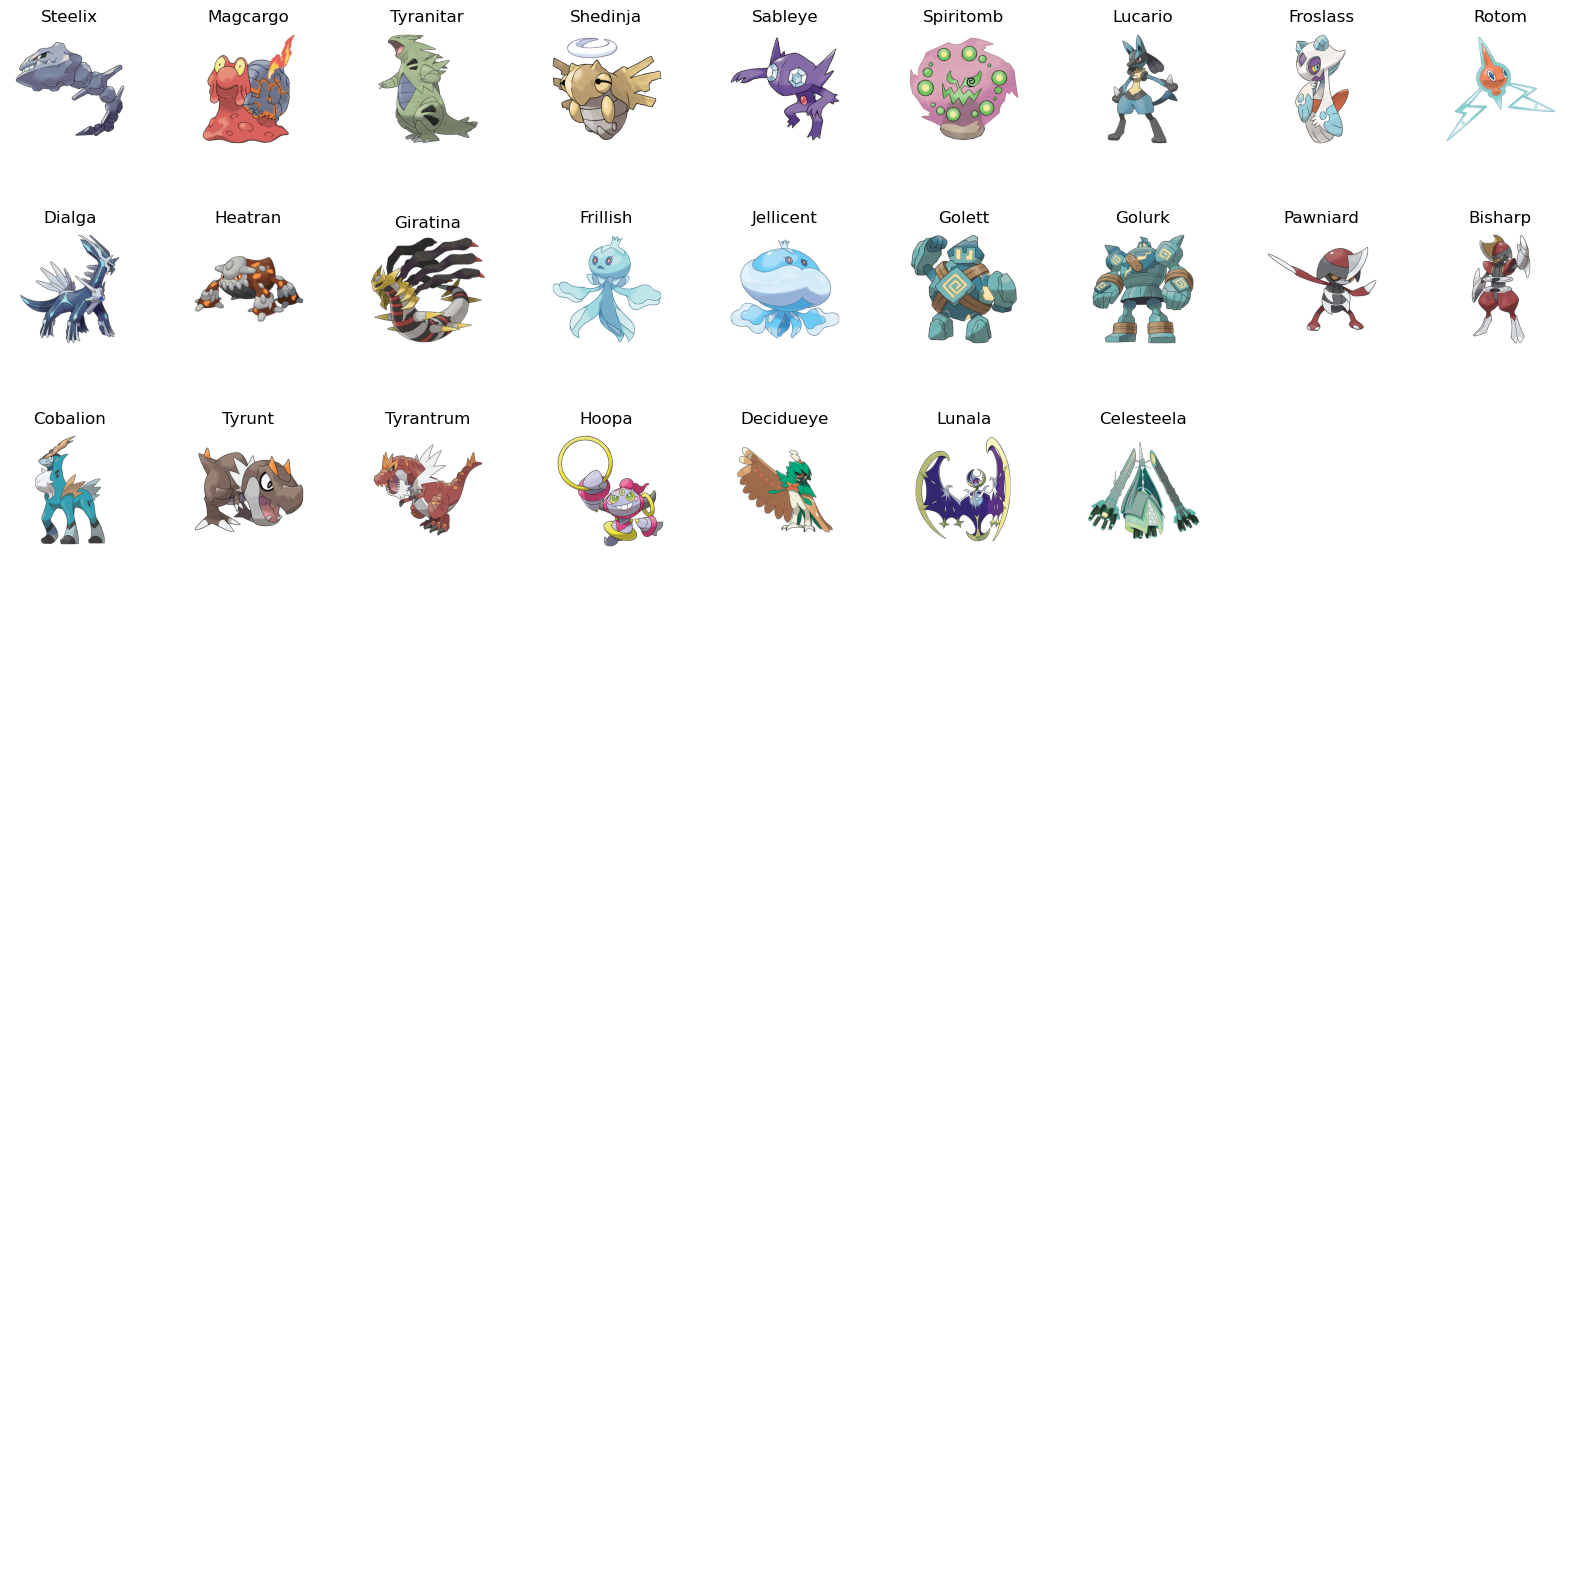

In [89]:
from IPython.display import Image, display
import os
import matplotlib.pyplot as plt
import pandas as pd

# Ruta a la carpeta de imágenes
img_folder = "img"

# Obtener los nombres de los Pokémon legendarios según K-Means
legendary_kmeans = legendary_candidates_kmeans['name'].tolist()

# Crear un DataFrame con los Pokémon legendarios según ambos modelos
legendary_df = pd.DataFrame({'name': legendary_kmeans, 'legendary_kmeans': 'KMEANS', 'legendary_bayesian': 'BAYESIAN GAUSSIAN'})

# Filtrar los Pokémon que son considerados legendarios por ambos modelos
legendary_common = legendary_df[legendary_df['name'].isin(legendary_candidates_bayesian['name'])]

# Mostrar imágenes de los Pokémon legendarios comunes en una tabla de 8x9
print("Pokémon legendarios comunes entre K-Means y Gaussian Mixture:")
fig, ax = plt.subplots(8, 9, figsize=(20, 20))

for idx, (index, row) in enumerate(legendary_common.iterrows()):
    pokemon_name = row['name']
    image_path = os.path.join(img_folder, f"{pokemon_name}.png")

    # Comprobar si la imagen existe antes de intentar mostrarla
    if os.path.exists(image_path):
        image = plt.imread(image_path)
        ax[idx//9, idx%9].imshow(image)
        ax[idx//9, idx%9].axis("off")
        ax[idx//9, idx%9].set_title(f"{pokemon_name}")
    else:
        print(f"Imagen no encontrada para {pokemon_name}")

# Ajustar el espaciado entre las subgráficas
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Eliminar los ejes adicionales si hay menos Pokémon que celdas en la tabla
if len(legendary_common) < 8 * 9:
    for idx in range(len(legendary_common), 8 * 9):
        ax.flatten()[idx].axis('off')

plt.show()



# Conclusions

Finalment, vull comentar que ens quedariem principalment amb els Pokémon que venen del Model de Bayesian Gaussian Mixture, ja que després d'avaluar les dues tècniques de clustering, s'observa que el model de Bayesian Gaussian Mixture ha obtingut un Silhouette Score més alt (0,254) en comparació amb el model de K-Means (0,173). Això indica una millor cohesió dins dels clusters i una millor separació entre ells amb el model de Bayesian Gaussian Mixture.

Un Silhouette Score superior indica que la estructura dels clusters generats pel model de Bayesian Gaussian Mixture és més robusta i millor definida. Aquest resultat suggereix que aquest model pot ser més adequat per a la classificació dels Pokémon en comparació amb el K-Means.

Cal tenir en compte que el Silhouette Score no proporciona una mesura directa de la precisió en la classificació dels Pokémon com a llegendaris o no. Per tant, per realitzar un millor estudi es podrien tenir en consideració realitzar altres  avaluacions i considerar altres factors i realitzar de nou l'aprenentatge.